# 🖼️ Image Processing — Lab 04
### Topics Covered
- **A. Image Flipping** — grayscale conversion & mirror effect
- **B. Intensity Transformation** — negative, power-law (gamma), intensity slicing, enhancement
- **C. Bit-Plane Slicing** — visualise all 8 bit planes

> **How to use:** Run each section independently. Replace `'your_image.jpg'` with a real image path, or let the notebook auto-generate a demo image.


## 📦 Imports & Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_image(source):
    if isinstance(source, (str, os.PathLike)):
        return np.array(Image.open(source))
    return np.asarray(source)

def demo_gray():
    x = np.linspace(0, 255, 256).astype(np.uint8)
    return np.tile(x, (256, 1))

def demo_color():
    base = demo_gray()
    r = base
    g = np.flipud(base)
    b = np.roll(base, 128, axis=1)
    return np.stack([r, g, b], axis=2)

print('✅ Imports successful!')

✅ Imports successful!


---
## 🔄 Section A — Image Flipping

### Task A1 — Color Image → Grayscale
Takes a **colour image** as input and converts it to **grayscale** using the luminosity formula:

$$\text{Gray} = 0.299R + 0.587G + 0.114B$$


Image is already grayscale.


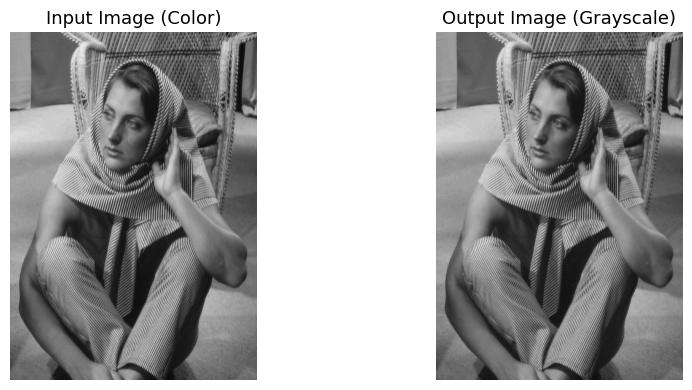

In [12]:
def color_to_gray(source):
    img = load_image(source)

    if img.ndim == 2:
        print('Image is already grayscale.')
        gray = img
    else:
        gray = (0.299 * img[:,:,0] +
                0.587 * img[:,:,1] +
                0.114 * img[:,:,2]).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img if img.ndim == 3 else img, cmap=None if img.ndim==3 else 'gray')
    axes[0].set_title('Input Image (Color)', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(gray, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Output Image (Grayscale)', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return gray


IMAGE_PATH = 'Images/image_1.tif'

if os.path.exists(IMAGE_PATH):
    gray_img = color_to_gray(IMAGE_PATH)
else:
    print('⚠️  No image found — using generated demo image.')
    gray_img = color_to_gray(demo_color())

### Task A2 — Mirror Effect
Takes an image as input and produces a **mirror (left-right flip)** placed side by side:

```
output = [ original | flipped ]
```


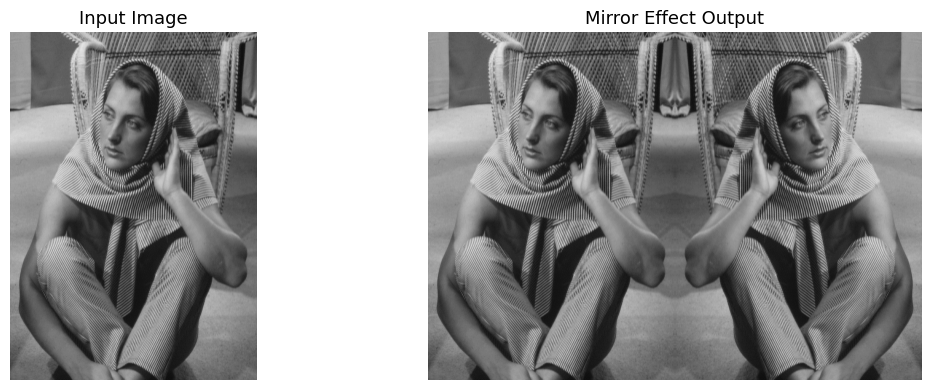

In [13]:
def mirror_effect(source):
    img = load_image(source)

    flipped = np.fliplr(img)

    mirrored = np.concatenate([img, flipped], axis=1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    cmap = 'gray' if img.ndim == 2 else None
    axes[0].imshow(img, cmap=cmap, vmin=0, vmax=255)
    axes[0].set_title('Input Image', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(mirrored, cmap=cmap, vmin=0, vmax=255)
    axes[1].set_title('Mirror Effect Output', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return mirrored


if os.path.exists(IMAGE_PATH):
    mirrored_img = mirror_effect(IMAGE_PATH)
else:
    print('⚠️  No image found — using generated demo image.')
    mirrored_img = mirror_effect(demo_color())

---
## ⚡ Section B — Intensity Transformation

### Task B1 — Image Negative
Applies the transformation:


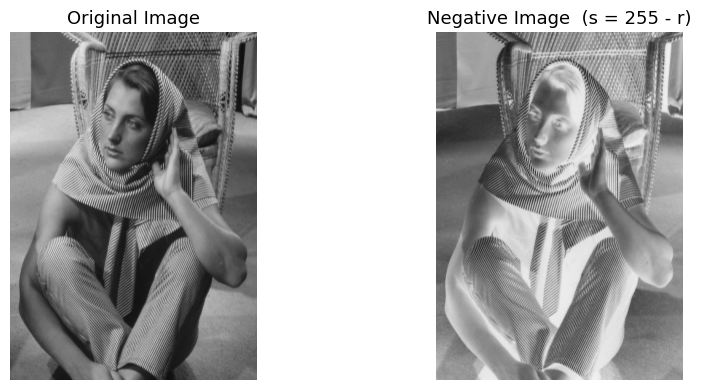

In [14]:
def image_negative(source):
    img = load_image(source).astype(np.uint8)
    neg = 255 - img

    cmap = 'gray' if img.ndim == 2 else None
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img, cmap=cmap, vmin=0, vmax=255)
    axes[0].set_title('Original Image', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(neg, cmap=cmap, vmin=0, vmax=255)
    axes[1].set_title('Negative Image  (s = 255 - r)', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return neg


if os.path.exists(IMAGE_PATH):
    neg_img = image_negative(IMAGE_PATH)
else:
    print('⚠️  No image found — using generated demo image.')
    neg_img = image_negative(demo_gray())

### Task B2 — Power-Law (Gamma) Curves
The power-law transformation is defined as:

$$s = c \cdot r^{\gamma}$$

**B2a — Non-normalised (0–255):** Curves do **not** converge at $s=255$ because $255^\gamma \neq 255$ unless $\gamma=1$. 
**B2b — Normalised (0–1):** All curves meet at $(1, 1)$ because $1^\gamma = 1$ for any $\gamma$.


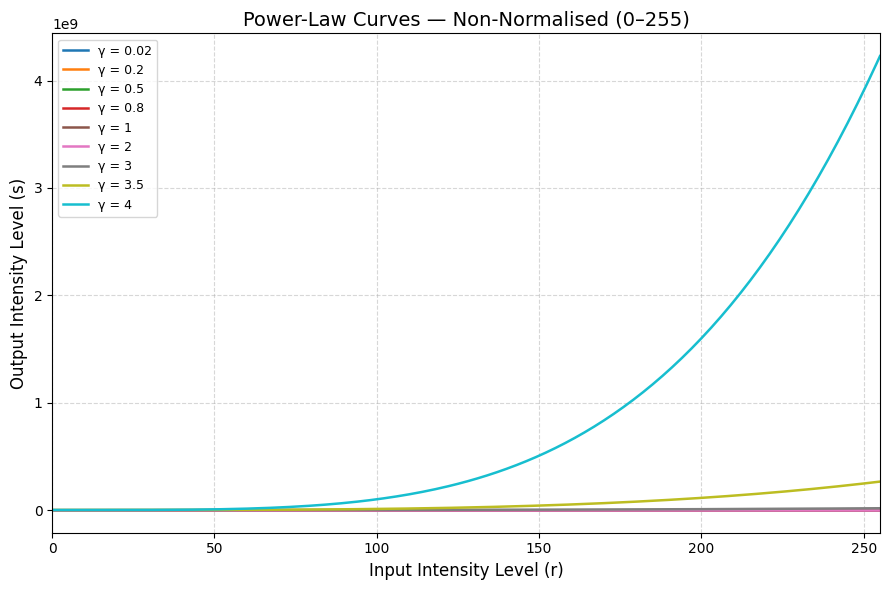


📌 Why curves do NOT meet at y=255:
   s = c * r^γ  →  when r=255: s = 255^γ
   255^γ = 255  ONLY when γ = 1.
   γ < 1  →  255^γ > 255  (output exceeds valid range)
   γ > 1  →  255^γ >> 255 (output far exceeds valid range)


In [15]:
GAMMA_VALUES = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

def plot_gamma_curves_non_norm(gamma_values=GAMMA_VALUES, c=1):
    """Plot power-law curves s = c*r^gamma for r in [0, 255]."""
    x = np.arange(0, 256, dtype=np.float64)   # 0 to 255

    fig, ax = plt.subplots(figsize=(9, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, len(gamma_values)))

    for gamma, color in zip(gamma_values, colors):
        y = c * np.power(x, gamma)
        ax.plot(x, y, color=color, linewidth=1.8, label=f'γ = {gamma}')

    ax.set_xlabel('Input Intensity Level (r)', fontsize=12)
    ax.set_ylabel('Output Intensity Level (s)', fontsize=12)
    ax.set_title('Power-Law Curves — Non-Normalised (0–255)', fontsize=14)
    ax.legend(loc='upper left', fontsize=9)
    ax.set_xlim(0, 255)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print('\n📌 Why curves do NOT meet at y=255:')
    print('   s = c * r^γ  →  when r=255: s = 255^γ')
    print('   255^γ = 255  ONLY when γ = 1.')
    print('   γ < 1  →  255^γ > 255  (output exceeds valid range)')
    print('   γ > 1  →  255^γ >> 255 (output far exceeds valid range)')

plot_gamma_curves_non_norm()

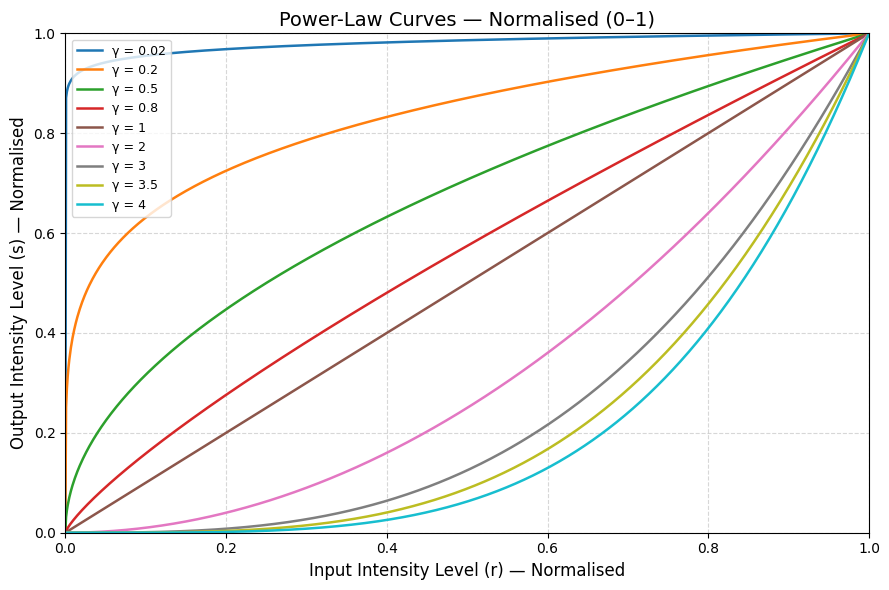


📌 Why curves DO meet at y=1 (normalised):
   s = c * r^γ  →  when r=1: s = 1^γ = 1 for ANY γ.
   Normalising input to [0,1] constrains the endpoint.
   Both start (0,0) and end (1,1) are guaranteed for all γ > 0.


In [16]:
# ── B2b: Normalised ───────────────────────────────────────────────
def plot_gamma_curves_norm(gamma_values=GAMMA_VALUES, c=1):
    """Plot power-law curves s = c*r^gamma for r in [0, 1] (normalised)."""
    x = np.linspace(0, 1, 1001)

    fig, ax = plt.subplots(figsize=(9, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, len(gamma_values)))

    for gamma, color in zip(gamma_values, colors):
        y = c * np.power(x, gamma)
        ax.plot(x, y, color=color, linewidth=1.8, label=f'γ = {gamma}')

    ax.set_xlabel('Input Intensity Level (r) — Normalised', fontsize=12)
    ax.set_ylabel('Output Intensity Level (s) — Normalised', fontsize=12)
    ax.set_title('Power-Law Curves — Normalised (0–1)', fontsize=14)
    ax.legend(loc='upper left', fontsize=9)
    ax.set_xlim(0, 1); ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print('\n📌 Why curves DO meet at y=1 (normalised):')
    print('   s = c * r^γ  →  when r=1: s = 1^γ = 1 for ANY γ.')
    print('   Normalising input to [0,1] constrains the endpoint.')
    print('   Both start (0,0) and end (1,1) are guaranteed for all γ > 0.')

plot_gamma_curves_norm()

### Task B3 — Gamma Correction on Images
Apply gamma correction $s = r^\gamma$ (normalised).
- **γ < 1** → brightens dark images
- **γ > 1** → darkens bright / over-exposed images


--- Applying gamma = 0.4 ---


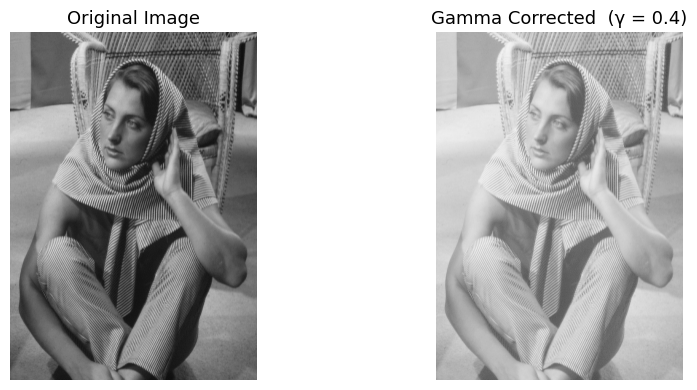

--- Applying gamma = 1.0 ---


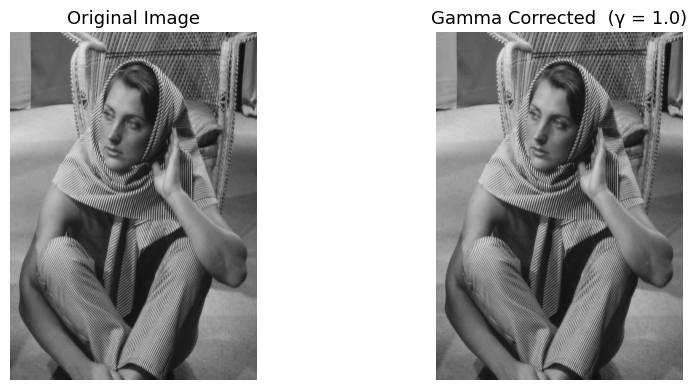

--- Applying gamma = 2.5 ---


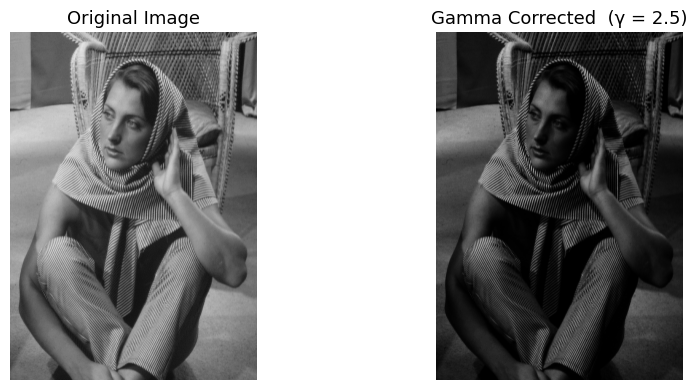

In [17]:
def gamma_correction(source, gamma, c=1):
    img = load_image(source).astype(np.float64)
    corrected = c * np.power(img / 255.0, gamma) * 255.0
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)

    cmap = 'gray' if img.ndim == 2 else None
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img.astype(np.uint8), cmap=cmap, vmin=0, vmax=255)
    axes[0].set_title('Original Image', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(corrected, cmap=cmap, vmin=0, vmax=255)
    axes[1].set_title(f'Gamma Corrected  (γ = {gamma})', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return corrected


src = IMAGE_PATH if os.path.exists(IMAGE_PATH) else demo_gray()

for g in [0.4, 1.0, 2.5]:
    print(f'--- Applying gamma = {g} ---')
    gamma_correction(src, gamma=g)

### Task B4 — Intensity Range Slicing
Set all pixel intensities in the range **[A, B]** to **L−1 = 255**,
keeping all other pixels unchanged.

Uses `np.where` (equivalent to MATLAB's `find`).


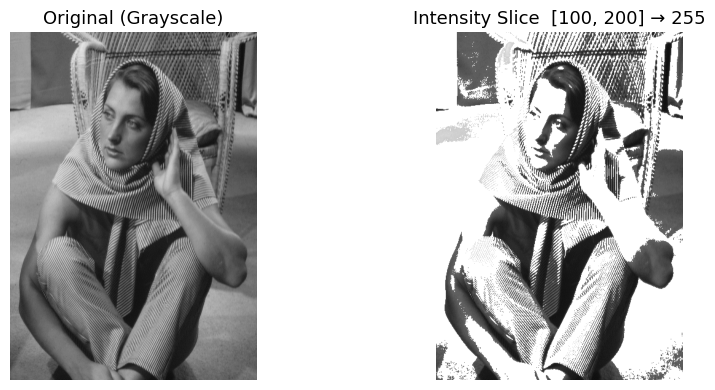

In [18]:
def intensity_slice(source, A, B, highlight_value=255):
    img = load_image(source).astype(np.uint8)

    if img.ndim == 3:
        gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)
    else:
        gray = img.copy()

    sliced = gray.copy()

    indices = np.where((gray >= A) & (gray <= B))
    sliced[indices] = highlight_value

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original (Grayscale)', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(sliced, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title(f'Intensity Slice  [{A}, {B}] → {highlight_value}', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return sliced


src = IMAGE_PATH if os.path.exists(IMAGE_PATH) else demo_gray()
sliced_img = intensity_slice(src, A=100, B=200)

### Task B5 & B6 — Image Enhancement
Apply suitable transformations to enhance images. Supported methods:

| Method | Formula | Use case |
|---|---|---|
| `gamma` | $s = r^\gamma$ (normalised) | Brighten/darken |
| `negative` | $s = 255 - r$ | Invert |
| `log` | $s = c \cdot \log(1+r)$ | Expand dark regions |
| `contrast_stretch` | Piecewise linear | Expand narrow range |


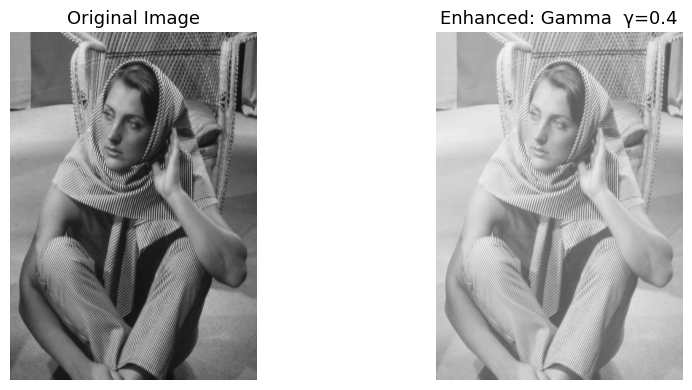

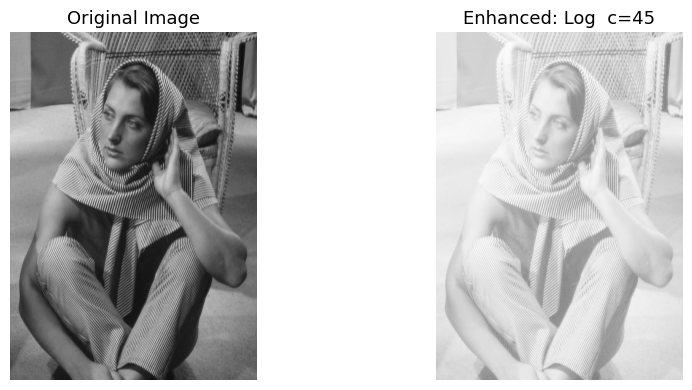

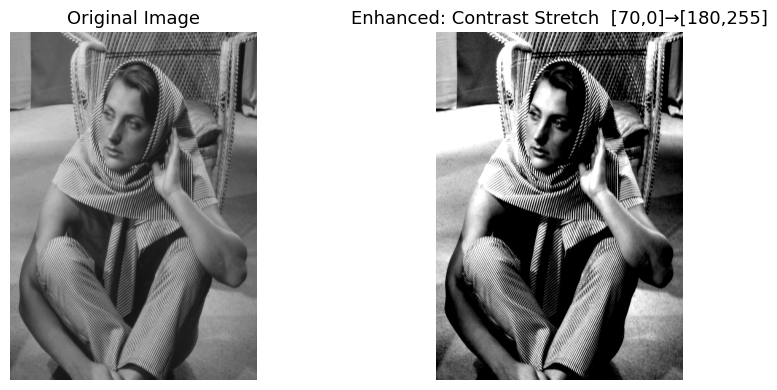

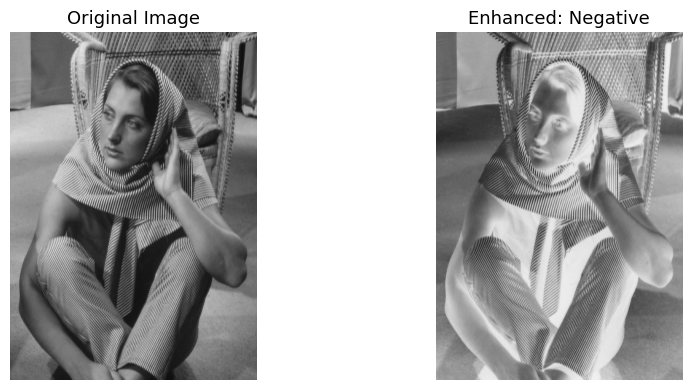

array([[104, 102, 100, ..., 185, 176, 170],
       [102, 104, 102, ..., 175, 163, 148],
       [102, 104, 104, ..., 146, 137, 130],
       ...,
       [176, 170, 165, ..., 144, 144, 148],
       [171, 173, 162, ..., 148, 146, 145],
       [170, 165, 165, ..., 152, 150, 149]], dtype=uint8)

In [19]:
def enhance_image(source, method='gamma', param=None):
    img = load_image(source)
    if img.ndim == 3:
        gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.float64)
    else:
        gray = img.astype(np.float64)

    method = method.lower()

    if method == 'gamma':
        gamma = param if param is not None else 0.4
        enhanced = np.power(gray / 255.0, gamma) * 255.0
        label = f'Gamma  γ={gamma}'

    elif method == 'negative':
        enhanced = 255.0 - gray
        label = 'Negative'

    elif method == 'log':
        c = param if param is not None else 45
        enhanced = c * np.log1p(gray)        # log1p = log(1 + r)
        enhanced = enhanced / enhanced.max() * 255.0
        label = f'Log  c={c}'

    elif method == 'contrast_stretch':
        if param is not None and len(param) == 4:
            r1, s1, r2, s2 = param
        else:
            r1, s1, r2, s2 = 70, 0, 180, 255
        enhanced = np.zeros_like(gray)
        # Segment 1: 0 → r1
        m1 = gray <= r1
        enhanced[m1] = (s1 / (r1 + 1e-6)) * gray[m1]
        # Segment 2: r1 → r2
        m2 = (gray > r1) & (gray <= r2)
        enhanced[m2] = s1 + ((s2 - s1) / (r2 - r1 + 1e-6)) * (gray[m2] - r1)
        # Segment 3: r2 → 255
        m3 = gray > r2
        enhanced[m3] = s2 + ((255 - s2) / (255 - r2 + 1e-6)) * (gray[m3] - r2)
        label = f'Contrast Stretch  [{r1},{s1}]→[{r2},{s2}]'

    else:
        raise ValueError(f'Unknown method: {method}')

    enhanced = np.clip(enhanced, 0, 255).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(gray.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original Image', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(enhanced, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title(f'Enhanced: {label}', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return enhanced


src = IMAGE_PATH if os.path.exists(IMAGE_PATH) else demo_gray()

enhance_image(src, method='gamma',            param=0.4)
enhance_image(src, method='log',              param=45)
enhance_image(src, method='contrast_stretch', param=[70, 0, 180, 255])
enhance_image(src, method='negative')

---
## 🧩 Section C — Bit-Plane Slicing

Every 8-bit pixel value is composed of 8 binary bits (bit 1 = LSB, bit 8 = MSB).
Extracting each bit creates a binary image that shows the contribution of that bit plane.

$$\text{bit}_k = \left\lfloor \frac{r}{2^{k-1}} \right\rfloor \mod 2$$

- **Higher bit planes (7, 8 / MSB)** → visually significant (carry most image information)
- **Lower bit planes (1, 2 / LSB)** → appear noisy, contribute little to perception


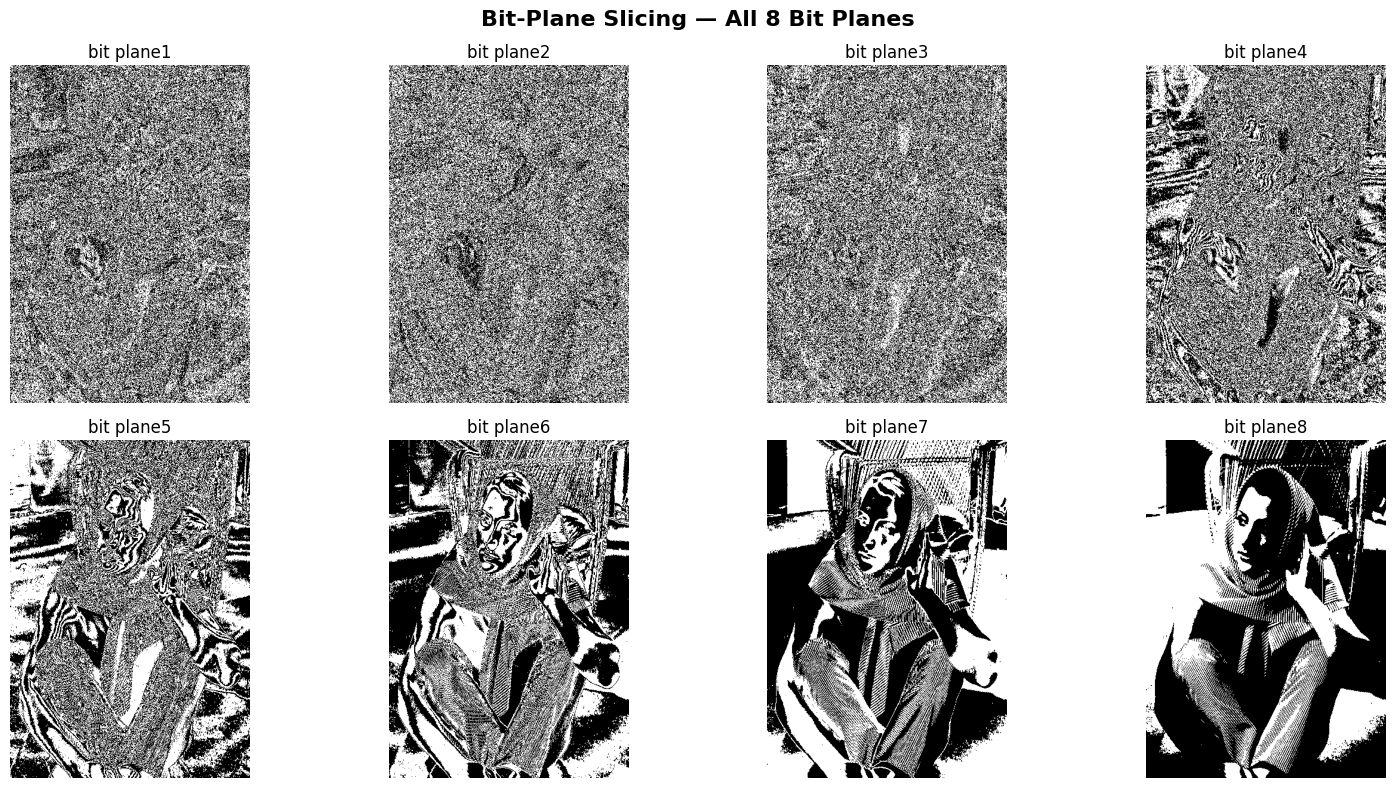


📌 Interpretation:
   Bit 8 (MSB) → carries the most visual information (structured)
   Bit 1 (LSB) → appears mostly random noise (least significant)
   Bits 7-8 are usually enough to reconstruct a near-identical image.


In [20]:
def display_bit_response(source):
    img = load_image(source).astype(np.uint8)

    # Convert to grayscale if colour
    if img.ndim == 3:
        img = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Bit-Plane Slicing — All 8 Bit Planes', fontsize=16, fontweight='bold')

    for bit in range(1, 9):          # bit 1 (LSB) to bit 8 (MSB)
        # Extract bit plane: shift right by (bit-1), then AND with 1
        # Equivalent to MATLAB: bitget(img, bit)
        bit_plane = (img >> (bit - 1)) & 1     # 0 or 1
        bit_plane_display = (bit_plane * 255).astype(np.uint8)  # scale for display

        row = (bit - 1) // 4
        col = (bit - 1) % 4
        ax = axes[row][col]
        ax.imshow(bit_plane_display, cmap='gray', vmin=0, vmax=255)
        ax.set_title(f'bit plane{bit}', fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    print('\n📌 Interpretation:')
    print('   Bit 8 (MSB) → carries the most visual information (structured)')
    print('   Bit 1 (LSB) → appears mostly random noise (least significant)')
    print('   Bits 7-8 are usually enough to reconstruct a near-identical image.')


src = IMAGE_PATH if os.path.exists(IMAGE_PATH) else demo_gray()
display_bit_response(src)

### Bonus — Reconstruct Image from Top N Bit Planes
Reconstruct the image using only the most significant bit planes to understand
how much information each plane carries.


--- Using top 1 bit plane(s) ---


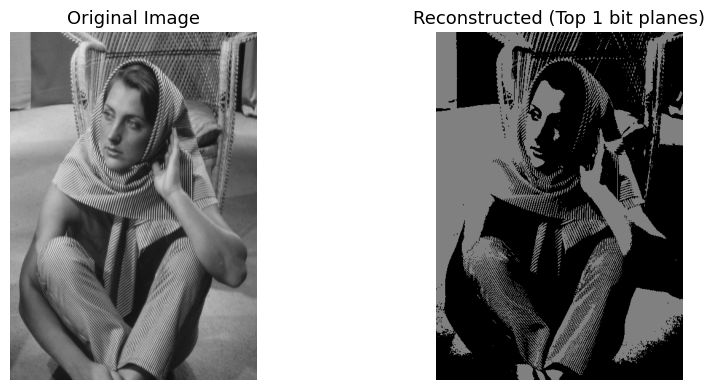

--- Using top 2 bit plane(s) ---


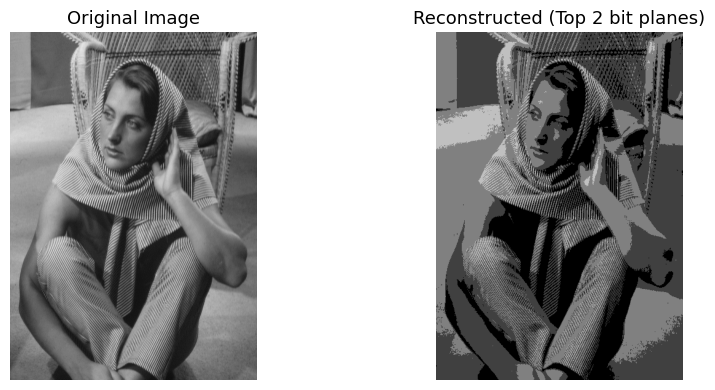

--- Using top 4 bit plane(s) ---


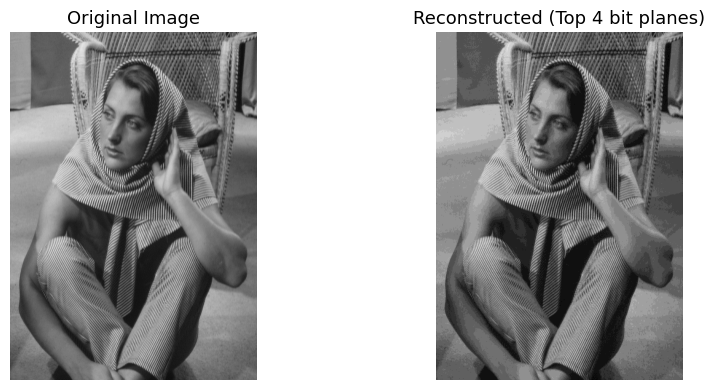

--- Using top 8 bit plane(s) ---


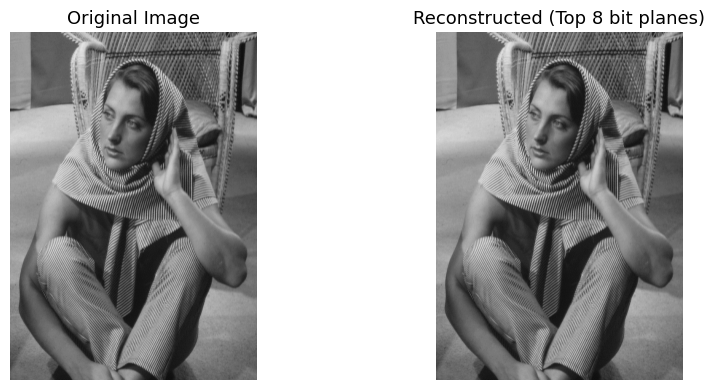

In [22]:
def reconstruct_from_bits(source, top_n_bits=4):
    img = load_image(source).astype(np.uint8)
    if img.ndim == 3:
        img = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

    reconstructed = np.zeros_like(img, dtype=np.uint8)

    for bit in range(8, 8 - top_n_bits, -1):
        bit_plane = (img >> (bit - 1)) & 1
        reconstructed = reconstructed | (bit_plane.astype(np.uint8) << (bit - 1))

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Original Image', fontsize=13)
    axes[0].axis('off')
    axes[1].imshow(reconstructed, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title(f'Reconstructed (Top {top_n_bits} bit planes)', fontsize=13)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
    return reconstructed


src = IMAGE_PATH if os.path.exists(IMAGE_PATH) else demo_gray()

for n in [1, 2, 4, 8]:
    print(f'--- Using top {n} bit plane(s) ---')
    reconstruct_from_bits(src, top_n_bits=n)